<a href="https://colab.research.google.com/github/parhambarazesh/PET575/blob/master/Singal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

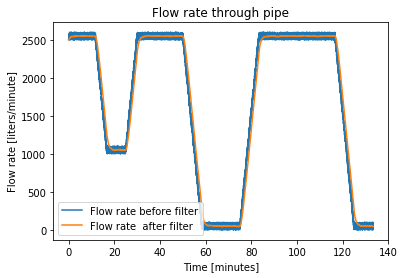

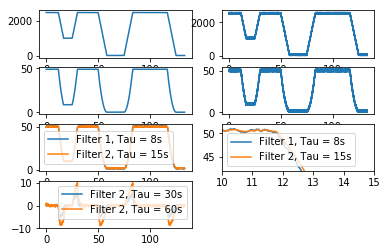

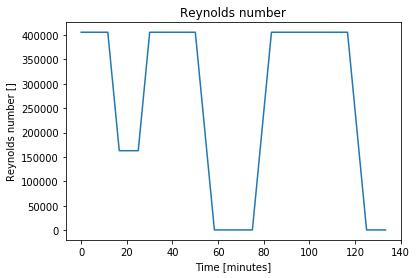

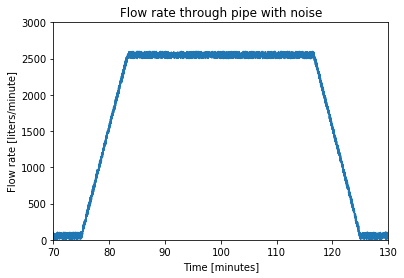

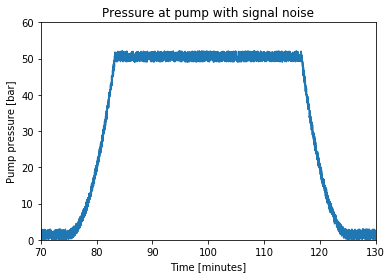

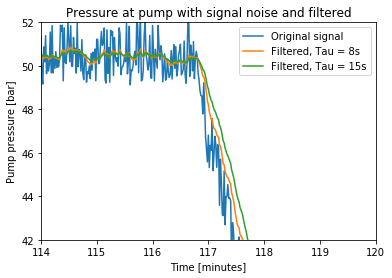

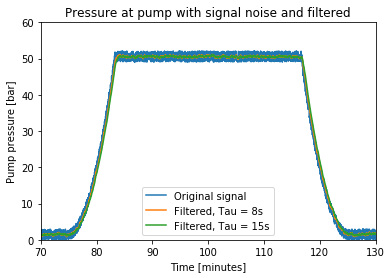

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def lowpassFilter(x,dt,timeConstant):
    
    alpha = dt / (timeConstant + dt)
    
    y=np.zeros(len(x))
    y[0] = x[0]
    n=len(x)

    for i in range(1,n):
        y[i] = alpha * x[i] + (1-alpha) * y[i-1]

    return y

def highpassFilter(x,dt,timeConstant):
    
    alpha =  timeConstant / (timeConstant + dt);
    
    y=np.zeros(len(x))
    y[0] = 0;
    n=len(x);

    for i in range(1,n):
        y[i] = alpha * y[i-1] + alpha * (x[i] - x[i-1])
    
    return y

g = 9.81
maxCount = 8000
q_p = 2500/60000 # volume flow [m3/s]
D = 0.1

p_p_ar=np.zeros(maxCount)
p_p_n_ar=np.zeros(maxCount)
q_p_ar=np.zeros(maxCount)
q_p_n_ar=np.zeros(maxCount)
Re_ar=np.zeros(maxCount)
for i in range(0,maxCount):
    if (i > 700) and (i < 1000):
        q_p = q_p - 5/60000 # reducing with 5 l/m

    if (i > 1500) and (i < 1800):
        q_p = q_p + 5/60000 # reducing with 5 l/m

    #if (i > 2100):
        #D = 0.0995; # sudden partial plugging of pipe

    if (i > 3000) and (i < 3500):
        q_p = q_p - 5/60000 # reducing with 5 l/m

    if (i > 4500) and (i < 5000):
        q_p = q_p + 5/60000 # increasing with 5 l/m

    if (i > 7000) and (i < 7500):
        q_p = q_p - 5/60000 # reducing with 5 l/m

    L = 2000
    rho = 1000
    A = np.pi*(D/2)*(D/2)
    V = L*A
    eps = 0.045e-3 # roughness for steel pipe
    my = 1.308e-3 # viscosity of water at 10 degC [Pa*s}
    v = q_p/A
    Re = (rho*q_p*D)/(my*A)
    f_darcy_lam = 64/Re
    inv_sqrt_f_darcy_turb = -1.8*np.log10((((eps/D)/3.7)**1.11)+(6.9/Re))
    f_darcy_turb = (1/inv_sqrt_f_darcy_turb)**2
    if Re > 2300:
        f = f_darcy_turb
    else:
        f = f_darcy_lam
    
    p_p = f*(L/D)*((rho*v*v)/2)
    p_p_noise = p_p + 3e5*np.random.rand()*1
    q_p_noise = q_p + (100/60000)*np.random.rand()*1
    # store variables
    p_p_ar[i] = p_p
    p_p_n_ar[i] = p_p_noise
    q_p_ar[i] = q_p
    q_p_n_ar[i] = q_p_noise
    Re_ar[i] = Re


q_p_n_ar_1 = lowpassFilter(q_p_n_ar,1,45)

plt.figure(1)
plt.plot(np.arange(0,maxCount)/60,q_p_n_ar*60000,np.arange(0,maxCount)/60,q_p_n_ar_1*60000)
plt.title('Flow rate through pipe')
plt.legend(['Flow rate before filter','Flow rate  after filter'])
plt.xlabel('Time [minutes]')
plt.ylabel('Flow rate [liters/minute]')

#postprocessing
p_p_lpf_ar = lowpassFilter(p_p_n_ar,1,8)
p_p_lpf15_ar = lowpassFilter(p_p_n_ar,1,15)
p_p_hpf_ar = highpassFilter(p_p_lpf_ar,1,30)
p_p_hpf60_ar = highpassFilter(p_p_lpf_ar,1,60)

#plotting

plt.figure(2)
plt.subplot(4,2,1)
plt.plot(np.arange(0,maxCount)/60,q_p_ar*60000)
#plt.title('Flow rate through pipe')
#plt.ylabel('Flow rate [liters/minute]')
#plt.xlabel('Time [minutes]')

plt.subplot(4,2,2)
plt.plot(np.arange(0,maxCount)/60,q_p_n_ar*60000)
#plt.title('Flow rate through pipe with noise')
#plt.ylabel('Flow rate [liters/minute]')
#plt.xlabel('Time [minutes]')

plt.subplot(4,2,3)
plt.plot(np.arange(0,maxCount)/60,p_p_ar/1e5)
#plt.title('Pressure at pump')
#plt.ylabel('Pump pressure [bar]')
#plt.xlabel('Time [minutes]')

plt.subplot(4,2,4)
plt.plot(np.arange(0,maxCount)/60,p_p_n_ar/1e5)
#plt.title('Pressure at pump with signal noise')
#plt.ylabel('Pump pressure [bar]')
#plt.xlabel('Time [minutes]')

plt.subplot(4,2,5)
plt.plot(np.arange(0,maxCount)/60,p_p_lpf_ar/1e5)
plt.plot(np.arange(0,maxCount)/60,p_p_lpf15_ar/1e5)
#plt.title('Pressure at pump with signal noise')
#plt.ylabel('Pump pressure [bar]')
#plt.xlabel('Time [minutes]')
plt.legend(['Filter 1, Tau = 8s','Filter 2, Tau = 15s'])

plt.subplot(4,2,6)
plt.plot(np.arange(0,maxCount)/60,p_p_lpf_ar/1e5)
plt.plot(np.arange(0,maxCount)/60,p_p_lpf15_ar/1e5)
#plt.title('Pressure at pump with signal noise')
#plt.ylabel('Pump pressure [bar]')
#plt.xlabel('Time [minutes]')
plt.axis([10,15,42,52])
plt.legend(['Filter 1, Tau = 8s','Filter 2, Tau = 15s'])

plt.subplot(4,2,7)
plt.plot(np.arange(0,maxCount)/60,p_p_hpf_ar/1e5)
plt.plot(np.arange(0,maxCount)/60,p_p_hpf60_ar/1e5)
#plt.title('Pressure at pump with signal noise')
#plt.ylabel('Pump pressure [bar]')
#plt.xlabel('Time [minutes]')
plt.legend(['Filter 2, Tau = 30s','Filter 2, Tau = 60s'])

plt.figure(3)
plt.plot(np.arange(0,maxCount)/60,Re_ar)
plt.title('Reynolds number')
plt.ylabel('Reynolds number []')
plt.xlabel('Time [minutes]')

plt.figure(4)
plt.plot(np.arange(0,maxCount)/60,q_p_n_ar*60000)
plt.title('Flow rate through pipe with noise')
plt.ylabel('Flow rate [liters/minute]')
plt.xlabel('Time [minutes]')
plt.axis([70,130,0,3000])

plt.figure(5)
plt.plot(np.arange(0,maxCount)/60,p_p_n_ar/1e5)
plt.title('Pressure at pump with signal noise')
plt.ylabel('Pump pressure [bar]')
plt.xlabel('Time [minutes]')
plt.axis([70,130,0,60])

plt.figure(6)
plt.plot(np.arange(0,maxCount)/60,p_p_n_ar/1e5)
plt.plot(np.arange(0,maxCount)/60,p_p_lpf_ar/1e5)
plt.plot(np.arange(0,maxCount)/60,p_p_lpf15_ar/1e5)
plt.title('Pressure at pump with signal noise and filtered')
plt.ylabel('Pump pressure [bar]')
plt.xlabel('Time [minutes]')
plt.axis([114,120,42,52])
plt.legend(['Original signal','Filtered, Tau = 8s','Filtered, Tau = 15s'])

plt.figure(7)
plt.plot(np.arange(0,maxCount)/60,p_p_n_ar/1e5)
plt.plot(np.arange(0,maxCount)/60,p_p_lpf_ar/1e5)
plt.plot(np.arange(0,maxCount)/60,p_p_lpf15_ar/1e5)
plt.title('Pressure at pump with signal noise and filtered')
plt.ylabel('Pump pressure [bar]')
plt.xlabel('Time [minutes]')
plt.axis([70,130,0,60])
plt.legend(['Original signal','Filtered, Tau = 8s','Filtered, Tau = 15s'])
